# Suicide Rates Overview 1985 to 2016 Dataset

The dataset is stored online in kaggle. The data compares socio-economic info with suicide rates by year and country.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("master.csv")

In [3]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
df = df.rename(columns={df.columns[9]: 'gdpYear'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
gdpYear               27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [7]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', 'gdpYear',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

## Let's predict the suicides_no given the rest of the data

If we look at the dataset, it makes sense to train a separate model for each country. We will group the data by countries and generate a separate model for each country.

# Data Cleaning

I decided to drop the suicides/100k pop and the country-year columns because they just barely repeated the information in other columns

In [8]:
df = df.drop(["suicides/100k pop", "country-year"], axis=1)

Moreover, I decided to drop the year column. 

In [9]:
df = df.drop(["year"], axis=1)

Use one-hot matrix to transform the categorical variables: year, sex, age (which is a range), and generation

In [10]:
one_hot_0 = pd.get_dummies(df["generation"])
one_hot_1 = pd.get_dummies(df["age"])
one_hot_2 = pd.get_dummies(df["sex"])

In [11]:
df = pd.concat([df, one_hot_0, one_hot_1, one_hot_2], axis=1)

In [12]:
df = df.drop(["age", "sex", "generation"], axis=1)

In [13]:
df.head()

,country,suicides_no,population,HDI for year,gdpYear,gdp_per_capita ($),Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years,female,male
0,Albania,21,312900,NaN,"2,156,624,900",796,0,0,1,0,0,0,1,0,0,0,0,0,0,1
1,Albania,16,308000,NaN,"2,156,624,900",796,0,0,0,0,0,1,0,0,1,0,0,0,0,1
2,Albania,14,289700,NaN,"2,156,624,900",796,0,0,1,0,0,0,1,0,0,0,0,0,1,0
3,Albania,1,21800,NaN,"2,156,624,900",796,0,1,0,0,0,0,0,0,0,0,0,1,0,1
4,Albania,9,274300,NaN,"2,156,624,900",796,1,0,0,0,0,0,0,1,0,0,0,0,0,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 20 columns):
country               27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
HDI for year          8364 non-null float64
gdpYear               27820 non-null object
gdp_per_capita ($)    27820 non-null int64
Boomers               27820 non-null uint8
G.I. Generation       27820 non-null uint8
Generation X          27820 non-null uint8
Generation Z          27820 non-null uint8
Millenials            27820 non-null uint8
Silent                27820 non-null uint8
15-24 years           27820 non-null uint8
25-34 years           27820 non-null uint8
35-54 years           27820 non-null uint8
5-14 years            27820 non-null uint8
55-74 years           27820 non-null uint8
75+ years             27820 non-null uint8
female                27820 non-null uint8
male                  27820 non-null uint8
dtypes: float64(1), int64(3)

Notice that the gdpYear variable is still an object. ummm... very evil

In [15]:
gdpYear = []
for string in df['gdpYear'].values.reshape(-1, 1):
    list_ = string[0].split(",")
    num = ''
    for ele in list_:
        num = num + ele
    num = int(num)
    gdpYear.append(num)

In [16]:
df['gdpYear'] = gdpYear

In [17]:
df.head()

,country,suicides_no,population,HDI for year,gdpYear,gdp_per_capita ($),Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years,female,male
0,Albania,21,312900,NaN,2156624900,796,0,0,1,0,0,0,1,0,0,0,0,0,0,1
1,Albania,16,308000,NaN,2156624900,796,0,0,0,0,0,1,0,0,1,0,0,0,0,1
2,Albania,14,289700,NaN,2156624900,796,0,0,1,0,0,0,1,0,0,0,0,0,1,0
3,Albania,1,21800,NaN,2156624900,796,0,1,0,0,0,0,0,0,0,0,0,1,0,1
4,Albania,9,274300,NaN,2156624900,796,1,0,0,0,0,0,0,1,0,0,0,0,0,1


# Train a model for each country

In [18]:
countries = df['country'].values
countries = list(dict.fromkeys(countries))
print(countries)

['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands', 'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Korea', 'Romania', 'Russian Federation', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and Grenadines', 'San Marino

Notice that HDI for year column has a fair amount of missing values. HDI stands for human development index. It sounds important for our future prediction. Therefore, I decided to fill out the missing values with the mean of the other values for that specific country.

In [19]:
key = 22
country = countries[key]

In [20]:
from sklearn.preprocessing import Imputer

In [21]:
df_country = df[df['country'] == country]
arr = df_country['HDI for year'].values.reshape(-1, 1)
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
arr = imp.fit_transform(arr)


In [22]:
df_country['HDI for year'] = arr    

In [23]:
df_country = df_country.drop(["country"], axis=1)

In [24]:
df_country

,suicides_no,population,HDI for year,gdpYear,gdp_per_capita ($),Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years,female,male
6368,77,73500,0.69400,22387561845,4978,0,1,0,0,0,0,0,0,0,0,0,1,0,1
6369,216,418200,0.69400,22387561845,4978,0,0,0,0,0,1,0,0,0,0,1,0,0,1
6370,226,659600,0.69400,22387561845,4978,1,0,0,0,0,0,0,0,1,0,0,0,0,1
6371,39,147800,0.69400,22387561845,4978,0,1,0,0,0,0,0,0,0,0,0,1,1,0
6372,89,356100,0.69400,22387561845,4978,0,0,1,0,0,0,0,1,0,0,0,0,0,1
6373,73,334000,0.69400,22387561845,4978,0,0,1,0,0,0,1,0,0,0,0,0,0,1
6374,99,544100,0.69400,22387561845,4978,0,0,0,0,0,1,0,0,0,0,1,0,1,0
6375,65,649700,0.69400,22387561845,4978,1,0,0,0,0,0,0,0,1,0,0,0,1,0
6376,21,349900,0.69400,22387561845,4978,0,0,1,0,0,0,0,1,0,0,0,0,1,0
6377,17,322000,0.69400,22387561845,4978,0,0,1,0,0,0,1,0,0,0,0,0,1,0


# Examine the Correlations

In [25]:
df_country.head()

,suicides_no,population,HDI for year,gdpYear,gdp_per_capita ($),Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years,female,male
6368,77,73500,0.694,22387561845,4978,0,1,0,0,0,0,0,0,0,0,0,1,0,1
6369,216,418200,0.694,22387561845,4978,0,0,0,0,0,1,0,0,0,0,1,0,0,1
6370,226,659600,0.694,22387561845,4978,1,0,0,0,0,0,0,0,1,0,0,0,0,1
6371,39,147800,0.694,22387561845,4978,0,1,0,0,0,0,0,0,0,0,0,1,1,0
6372,89,356100,0.694,22387561845,4978,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [26]:
corr = df_country.corr()['suicides_no'].sort_values(ascending=False)

In [27]:
corr

suicides_no           1.000000
55-74 years           0.515638
population            0.495591
male                  0.485024
Boomers               0.410872
35-54 years           0.378584
Silent                0.354644
75+ years            -0.024288
G.I. Generation      -0.033240
HDI for year         -0.056226
Generation X         -0.092222
gdpYear              -0.096355
gdp_per_capita ($)   -0.097862
25-34 years          -0.200356
15-24 years          -0.257950
Generation Z         -0.262547
5-14 years           -0.419395
Millenials           -0.436768
female               -0.485024
Name: suicides_no, dtype: float64

In [28]:
corr_target = abs(corr)
relevant_features = corr_target[corr_target>0.1]

In [29]:
relevant_features

suicides_no     1.000000
55-74 years     0.515638
population      0.495591
male            0.485024
Boomers         0.410872
35-54 years     0.378584
Silent          0.354644
25-34 years     0.200356
15-24 years     0.257950
Generation Z    0.262547
5-14 years      0.419395
Millenials      0.436768
female          0.485024
Name: suicides_no, dtype: float64

# Predictor Variable Skewed?

In [30]:
df_country

,suicides_no,population,HDI for year,gdpYear,gdp_per_capita ($),Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years,female,male
6368,77,73500,0.69400,22387561845,4978,0,1,0,0,0,0,0,0,0,0,0,1,0,1
6369,216,418200,0.69400,22387561845,4978,0,0,0,0,0,1,0,0,0,0,1,0,0,1
6370,226,659600,0.69400,22387561845,4978,1,0,0,0,0,0,0,0,1,0,0,0,0,1
6371,39,147800,0.69400,22387561845,4978,0,1,0,0,0,0,0,0,0,0,0,1,1,0
6372,89,356100,0.69400,22387561845,4978,0,0,1,0,0,0,0,1,0,0,0,0,0,1
6373,73,334000,0.69400,22387561845,4978,0,0,1,0,0,0,1,0,0,0,0,0,0,1
6374,99,544100,0.69400,22387561845,4978,0,0,0,0,0,1,0,0,0,0,1,0,1,0
6375,65,649700,0.69400,22387561845,4978,1,0,0,0,0,0,0,0,1,0,0,0,1,0
6376,21,349900,0.69400,22387561845,4978,0,0,1,0,0,0,0,1,0,0,0,0,1,0
6377,17,322000,0.69400,22387561845,4978,0,0,1,0,0,0,1,0,0,0,0,0,1,0


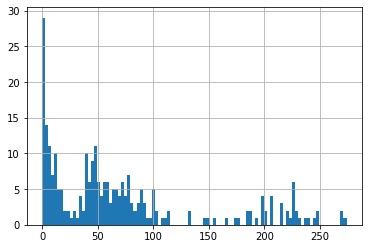

In [31]:
df_country['suicides_no'].hist(bins = 100)

Observe the data is extremely left skewed and might have a couple of outliers. Let's deal with the left skewed data with cube root

In [32]:
trans_suicides_no = []
for val in df_country['suicides_no'].tolist(): 
    trans_suicides_no.append(val ** (1/3))

(array([ 9., 20., 24., 26., 12., 61., 51., 15., 14., 30.]),
 array([0.        , 0.64950653, 1.29901306, 1.94851959, 2.59802612,
        3.24753264, 3.89703917, 4.5465457 , 5.19605223, 5.84555876,
        6.49506529]),
 <a list of 10 Patch objects>)

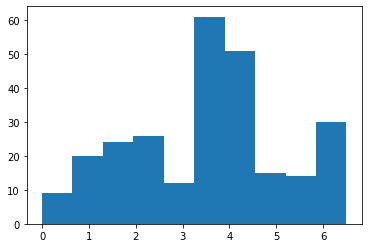

In [33]:
plt.hist(trans_suicides_no, bins = 10)

Ok. This is a little bit better. Let's add this column to the df_country

In [34]:
df_country["trans_suicides_no"] = trans_suicides_no

# Pairplots

In [35]:
import seaborn as sns

In [36]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 6368 to 6629
Data columns (total 20 columns):
suicides_no           262 non-null int64
population            262 non-null int64
HDI for year          262 non-null float64
gdpYear               262 non-null int64
gdp_per_capita ($)    262 non-null int64
Boomers               262 non-null uint8
G.I. Generation       262 non-null uint8
Generation X          262 non-null uint8
Generation Z          262 non-null uint8
Millenials            262 non-null uint8
Silent                262 non-null uint8
15-24 years           262 non-null uint8
25-34 years           262 non-null uint8
35-54 years           262 non-null uint8
5-14 years            262 non-null uint8
55-74 years           262 non-null uint8
75+ years             262 non-null uint8
female                262 non-null uint8
male                  262 non-null uint8
trans_suicides_no     262 non-null float64
dtypes: float64(2), int64(4), uint8(14)
memory usage: 17.9 KB


In [37]:
df_country_num = df_country[['population', 'HDI for year', 'gdpYear', 'gdp_per_capita ($)', 'trans_suicides_no']]

We want to do a sns.pairplot for all of the numerical variables (remove all of the categorical variables)

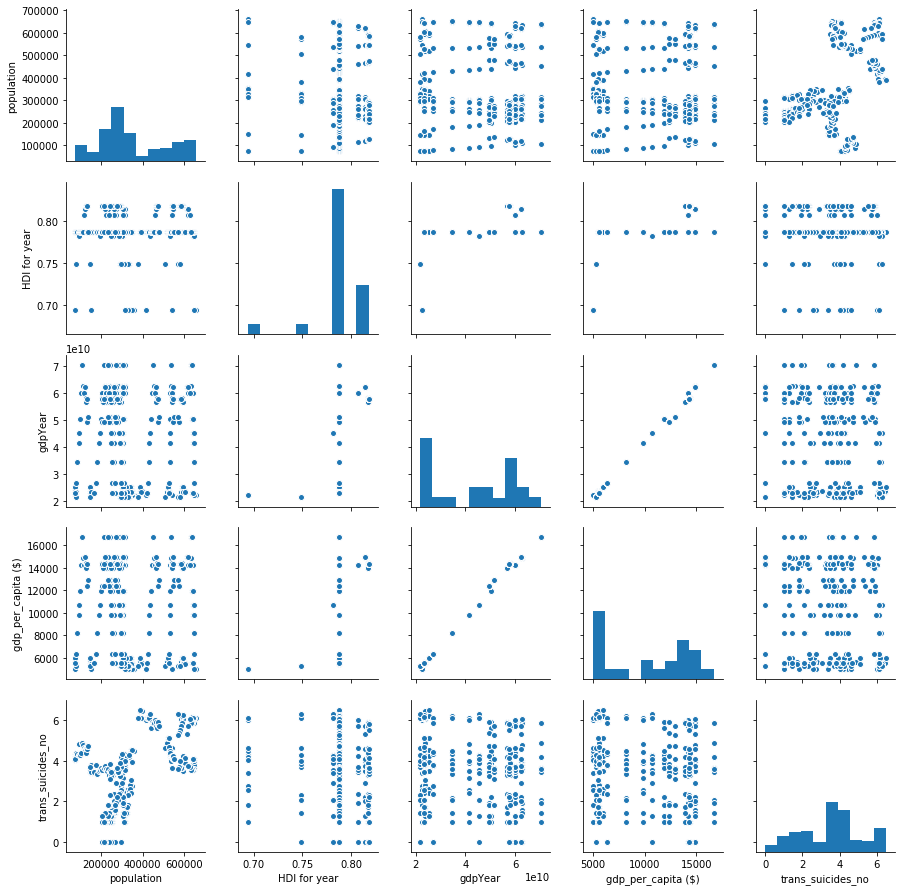

In [38]:
sns.pairplot(df_country_num)

# Model

Let's separate our target value

In [95]:
y = df_country_num['trans_suicides_no']
df = df_country_num.drop(columns = ['trans_suicides_no'])

Let's find out what polynomial fits our numerical features best

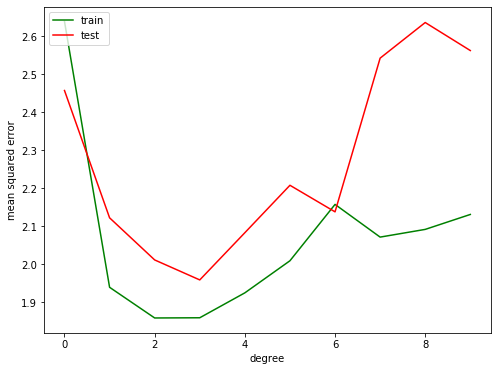

In [96]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3)

degrees = 10

train_error = []
test_error = []

for degree in range(degrees):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    train_error.append(mean_squared_error(y_train, model.predict(X_train)))
    test_error.append(mean_squared_error(y_test, model.predict(X_test)))
    
plt.figure(figsize=(8,6))
plt.plot(np.arange(degrees), train_error, color='green', label='train')
plt.plot(np.arange(degrees), test_error, color='red', label='test')
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')

Let us choose to use a degree 3 polynomial

In [97]:
model = make_pipeline(PolynomialFeatures(3), StandardScaler())
model.fit(df)
pd.DataFrame(model.transform(df)).head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.0,-1.714101,-3.681532,-1.263703,-1.335523,-1.128743,-1.766674,-1.431367,-1.432616,-3.601776,...,-3.518895,-1.477361,-1.51792,-1.185435,-1.204908,-1.221047,-1.045834,-1.05867,-1.070119,-1.080107
1,0.0,0.421896,-3.681532,-1.263703,-1.335523,0.207019,0.116101,-0.608023,-0.674998,-3.601776,...,-3.518895,-1.477361,-1.51792,-1.185435,-1.204908,-1.221047,-1.045834,-1.05867,-1.070119,-1.080107
2,0.0,1.917775,-3.681532,-1.263703,-1.335523,2.257534,1.434645,-0.031420,-0.144424,-3.601776,...,-3.518895,-1.477361,-1.51792,-1.185435,-1.204908,-1.221047,-1.045834,-1.05867,-1.070119,-1.080107
3,0.0,-1.253687,-3.681532,-1.263703,-1.335523,-0.999157,-1.360842,-1.253896,-1.269312,-3.601776,...,-3.518895,-1.477361,-1.51792,-1.185435,-1.204908,-1.221047,-1.045834,-1.05867,-1.070119,-1.080107
4,0.0,0.037082,-3.681532,-1.263703,-1.335523,-0.171937,-0.223093,-0.756354,-0.811488,-3.601776,...,-3.518895,-1.477361,-1.51792,-1.185435,-1.204908,-1.221047,-1.045834,-1.05867,-1.070119,-1.080107


Now, let's merge this transformed numerical data back with the categorical data

In [98]:
one_hot = df_country.drop(columns = ['suicides_no', 'population', 'HDI for year', 'gdpYear', 'gdp_per_capita ($)', 'trans_suicides_no'])

In [99]:
one_hot = one_hot.astype(float)
one_hot = one_hot.reset_index(drop = True)

In [100]:
something = pd.DataFrame(model.transform(df))

In [101]:
X = pd.concat([one_hot, something], axis=1)

In [102]:
X

,Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent,15-24 years,25-34 years,35-54 years,5-14 years,...,25,26,27,28,29,30,31,32,33,34
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.518895,-1.477361,-1.517920,-1.185435,-1.204908,-1.221047,-1.045834,-1.058670,-1.070119,-1.080107
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-3.518895,-1.477361,-1.517920,-1.185435,-1.204908,-1.221047,-1.045834,-1.058670,-1.070119,-1.080107
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-3.518895,-1.477361,-1.517920,-1.185435,-1.204908,-1.221047,-1.045834,-1.058670,-1.070119,-1.080107
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.518895,-1.477361,-1.517920,-1.185435,-1.204908,-1.221047,-1.045834,-1.058670,-1.070119,-1.080107
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-3.518895,-1.477361,-1.517920,-1.185435,-1.204908,-1.221047,-1.045834,-1.058670,-1.070119,-1.080107
5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-3.518895,-1.477361,-1.517920,-1.185435,-1.204908,-1.221047,-1.045834,-1.058670,-1.070119,-1.080107
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-3.518895,-1.477361,-1.517920,-1.185435,-1.204908,-1.221047,-1.045834,-1.058670,-1.070119,-1.080107
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-3.518895,-1.477361,-1.517920,-1.185435,-1.204908,-1.221047,-1.045834,-1.058670,-1.070119,-1.080107
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-3.518895,-1.477361,-1.517920,-1.185435,-1.204908,-1.221047,-1.045834,-1.058670,-1.070119,-1.080107
9,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-3.518895,-1.477361,-1.517920,-1.185435,-1.204908,-1.221047,-1.045834,-1.058670,-1.070119,-1.080107


Let's apply RidgeCV

In [104]:
model = RidgeCV(cv=10, alphas = [0.0001,0.1,1])
model.fit(X,y)

RidgeCV(alphas=[0.0001, 0.1, 1], cv=10, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [108]:
print('R2: ', model.score(X, y))
print('alpha: ', model.alpha_)

R2:  0.9456447093255268
alpha:  1


Note that it's the best when alpha = 1

In [113]:
print(model.intercept_)
print(model.coef_)

3.542711566063738
[ 1.81136008e-01  3.95634972e-01 -2.34531736e-01 -3.81532205e-01
 -4.81504008e-01  5.20796968e-01 -2.03563734e-01 -1.24775059e-01
  8.88376298e-01 -1.93747647e+00  8.51305750e-01  5.26133215e-01
 -7.00103570e-01  7.00103570e-01  0.00000000e+00  3.50196449e-01
 -1.09934210e-01  8.70568202e-03 -5.89833388e-02 -1.25765752e-01
  2.92718313e-01 -4.72293104e-03 -1.99078888e-02 -7.89323719e-03
  1.58283974e-03 -5.18807967e-02 -5.26263610e-03 -2.92896265e-03
  1.72481181e-03 -3.85107942e-01 -1.86659448e-01  1.35679062e-01
  1.41569235e-01  2.65386743e-01  2.67827823e-02  2.29960416e-02
 -1.50343127e-01 -1.12727693e-01 -7.26105018e-02  9.03631143e-02
  3.85281159e-03 -3.74446311e-02 -1.08020625e-02 -4.49985764e-03
  3.89561020e-03  2.19339361e-02  3.52567925e-02  4.96531629e-02
  6.50162728e-02]


The equation of the model: $ \text{trans_suicides_no} = 3.542711566063738 + \text{Boomers} * 0.181136008 + \text{G.I. Generation} * 0.395634972 - \text{Generation X}	* 0.234531736$ + ...

# R^2, adjusted R^2, and MSE on the train and test data

Train the model

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [116]:
model.fit(X_train,y_train)

RidgeCV(alphas=[0.0001, 0.1, 1], cv=10, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

Test on train data first

In [121]:
r2 = model.score(X_train,y_train)
adj_r2 = 1 - (1-r2)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print('R2: ', r2)
print('Adjusted R2: ', adj_r2)

R2:  0.9585307205135268
adjusted R2:  0.9432525649132473


On the test data

In [123]:
r2 = model.score(X_test,y_test)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [124]:
print('R2: ', r2)
print('Adjusted R2: ', adj_r2)

R2:  0.9109458807505715
Adjusted R2:  0.7604751275360199


Seems like the model is doing a little bit overfitting. The model has low bias and high variance since it is overfitting.